In [1]:
import pandas as pd
import matplotlib as mplot

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 10

### Arquivos extraídos do Microdados INEP

In [4]:
file_resp = '../dados/TS_ITEM.csv'
file_alunos_3EM_ESC = '../dados/TS_ALUNO_3EM_ESC.csv'
# file_alunos_3EM_AG = '../dados/TS_ALUNO_3EM_AG.csv'
file_alunos_9EF = '../dados/TS_ALUNO_9EF.csv'
file_alunos_5EF = '../dados/TS_ALUNO_5EF.csv'

### Conjunto Definido de Colunas à Serem Utilizadas

In [5]:
RESPOSTAS_INVALIDAS = ['X', '.', '*', ' ', '']

##### Identificadores das Colunas

In [6]:
ID_SERIE = 'ID_SERIE'
TIPO_PROVA = 'TIPO_PROVA'
DISCIPLINA = 'DISCIPLINA'
ID_SERIE_ITEM = 'ID_SERIE_ITEM'
ID_BLOCO = 'ID_BLOCO'
ID_POSICAO = 'ID_POSICAO'
GABARITO = 'GABARITO'
ID_PROVA_BRASIL = 'ID_PROVA_BRASIL' # Ano da Prova, pode ser ignorado, pois os arquivos são baixados por ano
ID_UF = 'ID_UF'
ID_MUNICIPIO = 'ID_MUNICIPIO'

##### Preenchimento Prova

In [7]:
ID_ALUNO = 'ID_ALUNO'
IN_PREENCHIMENTO_PROVA = 'IN_PREENCHIMENTO_PROVA'
IN_PRESENCA_PROVA = 'IN_PRESENCA_PROVA'
ID_REGIAO = 'ID_REGIAO'
ID_AREA = 'ID_AREA'

##### Respostas da Prova

In [8]:
ID_BLOCO_1 = 'ID_BLOCO_1'
ID_BLOCO_2 = 'ID_BLOCO_2'
TX_RESP_BLOCO_1_LP = 'TX_RESP_BLOCO_1_LP'
TX_RESP_BLOCO_2_LP = 'TX_RESP_BLOCO_2_LP'
TX_RESP_BLOCO_1_MT = 'TX_RESP_BLOCO_1_MT'
TX_RESP_BLOCO_2_MT = 'TX_RESP_BLOCO_2_MT'

##### Proeficiência do ALuno

In [9]:
PESO_ALUNO_LP = 'PESO_ALUNO_LP'
PESO_ALUNO_MT = 'PESO_ALUNO_MT'
PROFICIENCIA_LP = 'PROFICIENCIA_LP'
ERRO_PADRAO_LP = 'ERRO_PADRAO_LP'
PROFICIENCIA_LP_SAEB = 'PROFICIENCIA_LP_SAEB'
ERRO_PADRAO_LP_SAEB = 'ERRO_PADRAO_LP_SAEB'
PROFICIENCIA_MT = 'PROFICIENCIA_MT'
ERRO_PADRAO_MT = 'ERRO_PADRAO_MT'
PROFICIENCIA_MT_SAEB = 'PROFICIENCIA_MT_SAEB'
ERRO_PADRAO_MT_SAEB = 'ERRO_PADRAO_MT_SAEB'

##### Questionário Socioeconômico

In [10]:
IN_PREENCHIMENTO_QUESTIONARIO = 'IN_PREENCHIMENTO_QUESTIONARIO'
TX_RESP_Q001 = 'TX_RESP_Q001' # Sexo
TX_RESP_Q002 = 'TX_RESP_Q002' # Cor/Raça

In [11]:
colunas_resp = [
    ID_SERIE, TIPO_PROVA, DISCIPLINA,
    ID_SERIE_ITEM, ID_BLOCO, ID_POSICAO,
    GABARITO
]

In [12]:
colunas_aluno = [
    ID_UF, ID_MUNICIPIO, ID_REGIAO, ID_AREA,
    ID_SERIE, IN_PREENCHIMENTO_PROVA,
    ID_BLOCO_1, ID_BLOCO_2,
    TX_RESP_BLOCO_1_LP, TX_RESP_BLOCO_2_LP,
    TX_RESP_BLOCO_1_MT, TX_RESP_BLOCO_2_MT,
    PROFICIENCIA_LP,
    PROFICIENCIA_MT,
    TX_RESP_Q001,
    TX_RESP_Q002
]

### Arquivos

#### Gabarito, 666 itens corrigidos (+36KB)

#### 5SEM,     2.624.019 provas (+360MB)
#### 9SEM,     2.341.459 provas (+321MB)
#### 3SEMAG,   1.966.507 provas (+270MB)
###### 3SEMESC,  1.456.325 provas (+200MB)

In [13]:
df_gabarito = pd.read_csv(
    file_resp,
    delimiter=';', encoding='iso-8859-1',
    usecols=colunas_resp,
    # low_memory=True
)

In [14]:
df_gabarito.sample(10)

,ID_SERIE,TIPO_PROVA,DISCIPLINA,ID_SERIE_ITEM,ID_BLOCO,ID_POSICAO,GABARITO
345,5,Prova Regular,MT,5,2,2,B
148,3,Prova Regular,MT,3,3,6,D
85,3,Prova Regular,LP,9,7,8,C
155,3,Prova Regular,MT,3,3,13,D
72,3,Prova Regular,LP,9,6,8,C
207,3,Prova Regular,MT,3,7,13,D
113,3,Macrotipo 18 e 24,LP,3,2,10,C
629,9,Prova Regular,MT,9,7,3,B
197,3,Prova Regular,MT,3,7,3,A
616,9,Prova Regular,MT,9,6,3,D


In [15]:
df_gabarito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 7 columns):
ID_SERIE         666 non-null int64
TIPO_PROVA       666 non-null object
DISCIPLINA       666 non-null object
ID_SERIE_ITEM    666 non-null int64
ID_BLOCO         666 non-null int64
ID_POSICAO       666 non-null int64
GABARITO         666 non-null object
dtypes: int64(4), object(3)
memory usage: 36.5+ KB


Geralmente 15 segundos para carregar o conjunto de dados selecionado

In [16]:
df_aluno_5EF = pd.read_csv(
    file_alunos_5EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True, 
    nrows=20000  # Para fazer testes com os dados
)

In [17]:
df_aluno_9EF = pd.read_csv(
    file_alunos_9EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    nrows=20000  # Para fazer testes com os dados
)

In [18]:
# df_aluno_3EM_AG = pd.read_csv(
#     file_alunos_3EM_AG,
#     delimiter=',', encoding='iso-8859-1',
#     usecols=colunas_aluno,
#     low_memory=True, 
# )

In [19]:
df_aluno_3EM = pd.read_csv(
    file_alunos_3EM_ESC,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    nrows=20000  # Para fazer testes com os dados
)

In [20]:
df_aluno_5EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
12559,1,11,1100205,1,5,0,3,6,...........,...........,...........,...........,NaN,NaN,NaN,NaN
10421,1,11,1100189,2,5,1,2,3,DAADBCDBBCB,DAADBCBCACA,BBAACBDCBDC,CAACABBDBCB,-0.058900,0.255119,A,A
4187,1,11,1100080,2,5,1,7,3,BBDCDDBABAD,DDADBCBBABA,CCBCBCBDCCD,CAACABBCBCA,-0.041321,0.354895,A,C
6469,1,11,1100122,2,5,1,6,1,DDADBAACCBC,ACBDABCBBBC,CCCBABDDBBD,DCADBCABDCD,-1.052873,-0.176933,A,C
12433,1,11,1100205,1,5,1,1,3,CABBBCACDDD,ACDCACCDAAA,ADBDCAABADC,CACCABBCBAD,-1.921349,-0.590805,A,C
10208,1,11,1100189,2,5,0,1,4,...........,...........,...........,...........,NaN,NaN,NaN,NaN
12903,1,11,1100205,1,5,1,1,4,BCADDADADDC,ACCBCDBDACA,DCADCBAAADD,BDACAA*D.DC,-1.684763,-0.218756,A,B
12972,1,11,1100205,1,5,1,5,6,CBDBBDACDDD,DDBAABACCAB,DCBBDCDCCDB,DACBDDAACBC,-1.531625,-1.318413,NaN,C
18455,1,11,1100254,2,5,1,7,3,CACAABBABAB,AAADBAACADA,CBDABCDBDAD,CDBDBDCCABD,-0.959422,-1.673785,B,F
16698,1,11,1100205,1,5,1,7,2,CCABBCAADBD,AAACBABDDBD,CDDACDBADCC,BDDAADADADB,-2.174310,-1.299240,A,A


In [21]:
df_aluno_9EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
9900,1,11,1100205,1,9,1,7,1,ADCBBBCABACCB,ADADAABADCDDC,BDBAAABBDABCD,CDBDDCBCCBADD,0.349856,0.044128,B,C
6051,1,11,1100122,2,9,1,2,4,CDCADABDBCAAB,DBCDCBBAADBCB,CDACCABBADCDD,BABAACCBCCACA,1.024022,0.798070,B,C
19833,1,11,1100700,2,9,1,2,4,CDBADABDBCACD,ABBDBBBADDBCB,CAACCABBCCCDC,BBDBBACBCCACB,0.826970,0.774597,B,NaN
12575,1,11,1100205,1,9,1,1,4,CCABAADADCABB,DACDBBBADDADB,CACBBDCDBDCDA,.............,0.411102,-1.649126,NaN,NaN
18929,1,11,1100403,2,9,1,6,1,ACDCDDCDBDABA,DBAACCCABAADD,DCADDAAADCABA,DDDBBCBABDBCA,-1.194358,-0.831214,B,F
8431,1,11,1100155,2,9,0,4,6,.............,.............,.............,.............,NaN,NaN,NaN,NaN
541,1,11,1100023,2,9,0,5,6,.............,.............,.............,.............,NaN,NaN,NaN,NaN
19184,1,11,1100452,2,9,1,4,7,ABCCCBBADDBDD,ADDADBBABAACD,BAABCBCBCCCCA,BABCDCDBDADBD,0.396821,1.144180,B,A
840,1,11,1100023,2,9,1,7,3,ABBBABCABDACA,CDDCAACCBCCDD,BABCADDBDAAAA,DBDCCDBDAAACB,-0.170429,0.797852,B,C
5569,1,11,1100122,2,9,1,1,4,CBBDAADADCCCC,DBADCBBADDBCB,CBBDDBBCABBCC,BAADCDCBCCDCB,1.200819,1.042429,B,C


In [22]:
df_aluno_3EM.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
17603,1,12,1200500,2,12,1,1,3,AEEEEEDAAAACD,AEEAEEDDACEAB,CBBABEDDBCDBC,BAABCACBABAAB,0.297434,-0.143815,A,C
7224,1,11,1100288,2,12,1,1,4,BCABAEBBDEEBE,BBBDCEABCEABA,CDDDBEADCACCD,CDBDBABADCAEB,0.112073,0.794037,B,C
7470,1,11,1100288,2,12,1,3,5,DCBCDABDAEEAC,ABBDBBDDAEEEA,EEDDBBCCBDDCD,AEBCCABCABEAE,0.176348,0.616499,A,C
10214,1,11,1101500,2,12,1,5,7,EBBECACDCBAEA,ABBCCAABBEBAD,ADADEEACDABAC,ABEDAACCAABCA,-1.524842,0.009285,B,F
3525,1,11,1100122,2,12,1,1,3,BBDCBECCCDBBE,CDECDBBDCCAAA,CDEDBDDADDDBD,BBADDCACDCBBD,-0.711846,0.644069,A,C
14205,1,12,1200401,1,12,1,6,2,DCEDCBBBDACAE,EDAEECDDBBCBC,ACBADEADBCCCA,DECECADDCEBBD,-0.258139,0.246598,NaN,NaN
8994,1,11,1100452,2,12,1,2,3,DECECCDDACDEE,DDDDAEDCDEDBD,DACBADDBCEACC,CDEEABCBADEDD,-0.915971,-0.189102,B,A
10677,1,11,6305463,2,12,1,1,2,BACBCDAABEBED,BAAAECDCDBACE,CDDAAADDCEDCD,DCAACADACECBC,0.443901,0.239787,B,C
14473,1,12,1200401,1,12,1,1,3,ABCEACCCADBBA,CAEBCABDCAEAA,CDDADCADDACBC,BACDBDCBAECAE,-0.595991,-0.348612,B,C
19380,1,13,1300086,2,12,1,1,2,ACBCDDABBBEAD,ECEEEDDDDEEAD,CDEABAABBEDED,DADDDCBCCABDA,0.096254,-0.633539,B,C


### Após o carregamento, o DataFrame tem suas colunas reorganizadas, logo:

In [23]:
colunas_aluno = list(df_aluno_5EF.columns.values)

### Série

In [24]:
idx_serie_gab = colunas_resp.index(ID_SERIE)
idx_serie_aluno = colunas_aluno.index(ID_SERIE)

### Respostas

In [25]:
idx_disciplina = colunas_resp.index(DISCIPLINA)
idx_posicao_gabarito = colunas_resp.index(ID_POSICAO)
idx_gabarito = colunas_resp.index(GABARITO)
idx_preenchimento_prova = colunas_aluno.index(IN_PREENCHIMENTO_PROVA)

### Blocos

In [26]:
bloco_gab = colunas_resp.index(ID_BLOCO) 
bloco_resp_1 = colunas_aluno.index(ID_BLOCO_1)
bloco_resp_2 = colunas_aluno.index(ID_BLOCO_2)
aluno_resp_bloco_1_lp = colunas_aluno.index(TX_RESP_BLOCO_1_LP) 
aluno_resp_bloco_2_lp = colunas_aluno.index(TX_RESP_BLOCO_2_LP) 
aluno_resp_bloco_1_mt = colunas_aluno.index(TX_RESP_BLOCO_1_MT) 
aluno_resp_bloco_2_mt = colunas_aluno.index(TX_RESP_BLOCO_2_MT) 

### Região de Estudo/Aluno

In [27]:
idx_uf = colunas_aluno.index(ID_UF)
idx_municipio = colunas_aluno.index(ID_MUNICIPIO)
idx_regiao = colunas_aluno.index(ID_REGIAO)
idx_area = colunas_aluno.index(ID_AREA)
idx_sexo = colunas_aluno.index(TX_RESP_Q001)
idx_raca = colunas_aluno.index(TX_RESP_Q002)

## Cálculo de Acertos

In [28]:
num_estados = {
    11: 'RO',
    12: 'AC',
    13: 'AM',
    14: 'RR',
    15: 'PA',
    16: 'AP',
    17: 'TO',
    21: 'MA',
    22: 'PI',
    23: 'CE',
    24: 'RN',
    25: 'PB',
    26: 'PE',
    27: 'AL',
    28: 'SE',
    29: 'BA',
    31: 'MG',
    32: 'ES',
    33: 'RJ',
    35: 'SP',
    41: 'PR',
    42: 'SC',
    43: 'RS',
    50: 'MS',
    51: 'MT',
    52: 'GO',
    53: 'DF'
}

In [29]:
filtro_de_colunas_resposta = ['serie', 'nota_lp', 'nota_mt', 'uf', 'municipio', 'regiao', 'area', 'sexo', 'raca']

In [30]:
def filtrar_dados(serie_dados, nao_realizado=0, colunas=filtro_de_colunas_resposta):
    """
    
    :param serie_dados:     Série de dados carregados (DataFrame)
    :param nao_realizado:   Número de ocorrências do Não Preenchimento de Prova
    :param colunas:         Filtro de Colunas à serem aplicadas ao resultado de serie_dados
    :param resposta_dados:  DataFrame de resposta, caso não seja vazio, os dados serão adicionados a ele 
    :return: 
        Dados Filtrado (DataFrame)
        Quantidade não realizada de provas
    """
    resposta_dados = []
    i = 0
    for r in serie_dados.to_numpy():  # [len(serie_dados.to_numpy())//2:]:
        i = i + 1
        not_lim = 1000
        if 0 == i % not_lim:
            print(f'iter {not_lim}, resp: {len(resposta_dados)}, {nao_realizado} => {len(resposta_dados) + nao_realizado}')
        
        nota_mt = 0
        nota_pt = 0
        
        respostas_lp = [
            [False for x in range(len(r[aluno_resp_bloco_1_lp]))],
            [False for x in range(len(r[aluno_resp_bloco_2_lp]))]
        ]
        respostas_mt = [
            [False for x in range(len(r[aluno_resp_bloco_1_mt]))],
            [False for x in range(len(r[aluno_resp_bloco_2_mt]))]
        ]
        
        # Quem não fez a prova é ignorado
        if not bool(int(r[idx_preenchimento_prova])):
            nao_realizado = nao_realizado + 1
            continue
        serie_aluno = r[idx_serie_aluno]
        if serie_aluno in (12, 13):
            # 12 - 3ª ou 4ª Série do Ensino Médio
            # 13 - 3ª ou 4ª Série do Ensino Médio Integrado
            serie_aluno = 3
        for gab in df_gabarito.to_numpy():
            # if gab['ID_SERIE'] == r['ID_SERIE']:
            if gab[idx_gabarito] not in RESPOSTAS_INVALIDAS:
                if gab[idx_serie_gab] == serie_aluno and\
                        (r[bloco_resp_1] == gab[bloco_gab] or r[bloco_resp_2] == gab[bloco_gab]):
                    # 8 'TX_RESP_BLOCO_1_LP'8, 'TX_RESP_BLOCO_2_LP'9, 'TX_RESP_BLOCO_1_MT'10, 'TX_RESP_BLOCO_2_MT'11,
                    is_bloco_1 = r[bloco_resp_1] == gab[bloco_gab]
                    if is_bloco_1 and r[bloco_resp_2] == gab[bloco_gab]:
                        print ('bloco EDGE CASES!!')
                    idx_r = 0 if is_bloco_1 else 1
                    if gab[idx_disciplina] == 'LP':
                        resp_aluno = str(r[aluno_resp_bloco_1_lp if is_bloco_1 else aluno_resp_bloco_2_lp])
                        if (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_pt += 1
                            (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1] = True
                    elif gab[idx_disciplina] == 'MT':
                        resp_aluno = str(r[aluno_resp_bloco_1_mt if is_bloco_1 else aluno_resp_bloco_2_mt])
                        if (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_mt += 1
                            (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1] = True
        if nota_pt or nota_mt:
            resposta_dados.append({
                colunas[0]: serie_aluno,
                colunas[1]: nota_pt,
                colunas[2]: nota_mt,
                colunas[3]: num_estados.get(r[idx_uf], r[idx_uf]),
                colunas[4]: r[idx_municipio],
                colunas[5]: r[idx_regiao],
                colunas[6]: r[idx_area],
                colunas[7]: r[idx_sexo],
                colunas[8]: r[idx_raca]
            })
            # ,
            #     ignore_index=True
            # )
    return resposta_dados, nao_realizado

#### O filtro aplicado demora cerca de 25 minutos cada arquivo 


In [31]:
dados_filtrados = pd.DataFrame(columns=filtro_de_colunas_resposta)

In [32]:
r_filtro, qtd_prova_nao_realizada_5SEM = filtrar_dados(
    df_aluno_5EF, 0,
)

iter 1000, resp: 884, 115 => 999
iter 1000, resp: 1741, 258 => 1999
iter 1000, resp: 2606, 393 => 2999
iter 1000, resp: 3485, 514 => 3999
iter 1000, resp: 4365, 633 => 4998
iter 1000, resp: 5251, 746 => 5997
iter 1000, resp: 6126, 871 => 6997
iter 1000, resp: 6998, 999 => 7997
iter 1000, resp: 7822, 1174 => 8996
iter 1000, resp: 8689, 1307 => 9996
iter 1000, resp: 9569, 1427 => 10996
iter 1000, resp: 10413, 1583 => 11996
iter 1000, resp: 11309, 1687 => 12996
iter 1000, resp: 12173, 1823 => 13996
iter 1000, resp: 13052, 1943 => 14995
iter 1000, resp: 13928, 2067 => 15995
iter 1000, resp: 14792, 2201 => 16993
iter 1000, resp: 15583, 2410 => 17993
iter 1000, resp: 16426, 2567 => 18993
iter 1000, resp: 17325, 2668 => 19993


In [33]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [34]:
r_filtro, qtd_prova_nao_realizada_9SEM = filtrar_dados(
    df_aluno_9EF, 0,
)

iter 1000, resp: 781, 218 => 999
iter 1000, resp: 1575, 424 => 1999
iter 1000, resp: 2396, 603 => 2999
iter 1000, resp: 3211, 788 => 3999
iter 1000, resp: 4068, 931 => 4999
iter 1000, resp: 4905, 1094 => 5999
iter 1000, resp: 5746, 1253 => 6999
iter 1000, resp: 6483, 1516 => 7999
iter 1000, resp: 7208, 1791 => 8999
iter 1000, resp: 8032, 1967 => 9999
iter 1000, resp: 8868, 2131 => 10999
iter 1000, resp: 9693, 2306 => 11999
iter 1000, resp: 10534, 2465 => 12999
iter 1000, resp: 11368, 2631 => 13999
iter 1000, resp: 12033, 2966 => 14999
iter 1000, resp: 12854, 3145 => 15999
iter 1000, resp: 13608, 3391 => 16999
iter 1000, resp: 14436, 3563 => 17999
iter 1000, resp: 15213, 3786 => 18999
iter 1000, resp: 16000, 3999 => 19999


In [35]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [36]:
r_filtro, qtd_prova_nao_realizada_3EM = filtrar_dados(
    df_aluno_3EM, 0,
)

iter 1000, resp: 999, 0 => 999
iter 1000, resp: 1999, 0 => 1999
iter 1000, resp: 2999, 0 => 2999
iter 1000, resp: 3999, 0 => 3999
iter 1000, resp: 4999, 0 => 4999
iter 1000, resp: 5999, 0 => 5999
iter 1000, resp: 6999, 0 => 6999
iter 1000, resp: 7999, 0 => 7999
iter 1000, resp: 8999, 0 => 8999
iter 1000, resp: 9999, 0 => 9999
iter 1000, resp: 10999, 0 => 10999
iter 1000, resp: 11999, 0 => 11999
iter 1000, resp: 12999, 0 => 12999
iter 1000, resp: 13999, 0 => 13999
iter 1000, resp: 14999, 0 => 14999
iter 1000, resp: 15999, 0 => 15999
iter 1000, resp: 16999, 0 => 16999
iter 1000, resp: 17999, 0 => 17999
iter 1000, resp: 18999, 0 => 18999
iter 1000, resp: 19999, 0 => 19999


In [37]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

## Estudo Proposto

#### Contagem de provas por estado

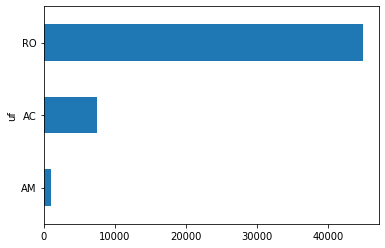

In [38]:
dados_filtrados.groupby('uf').size().sort_values().plot.barh(
    figsize=(6, 4)
)

In [39]:
# dados_filtrados.groupby('municipio').size()

municipio
1100015     865
1100023    2933
1100031     169
1100049    2407
1100056     528
           ... 
6305498      27
6305512      23
6305517      19
6305526     432
6305532       9
Length: 96, dtype: int64

In [40]:
# dados_filtrados.groupby('regiao').size()

regiao
1    53327
dtype: int64

In [66]:
len(dados_filtrados), qtd_prova_nao_realizada_5SEM,\
qtd_prova_nao_realizada_9SEM, qtd_prova_nao_realizada_3EM

(53327, 2668, 3999, 0)

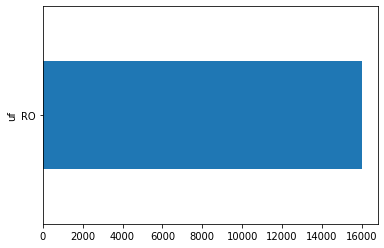

In [42]:
dados_filtrados.query('serie == 9').groupby('uf').size().sort_values().plot.barh(figsize=(6, 4),)

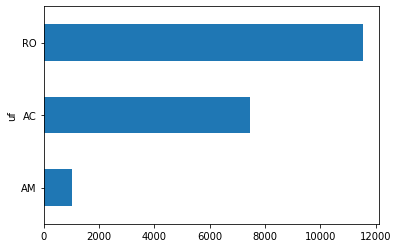

In [43]:
dados_filtrados.query('serie == 3').groupby('uf').size().sort_values().plot.barh(figsize=(6, 4),)

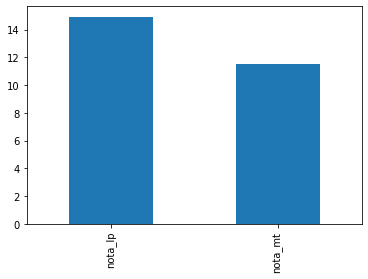

In [63]:
dados_filtrados[['nota_lp', 'nota_mt']].mean().plot(kind='bar')

### Médias Com Dois Índices

In [45]:
def conta_tamanho_grupo(grupo, grupo_buscado):
    print(f'grupo {grupo}, grupo_buscado {grupo_buscado} type {type(grupo_buscado)}')
    if not grupo_buscado:
        return 1
    gd = dados_filtrados.groupby(grupo).size()
    i = False
    p = False
    if isinstance(grupo, (list, tuple)):
        # gd = gd.unstack()
        cv = list(gd.unstack().columns.values)
        for g in grupo_buscado:
            if g in cv:
                i = cv.index(g)
                p = True
        # print(f'cv {cv}, i: {i}')
    else:
        i = gd.index.contains(grupo_buscado)
    # print(gd)
    # print(gd[11][i])
    if p:
        print(gd[i])
        return gd[i]
    if i:
        return gd[grupo_buscado]
    print(f'nao encontrado {grupo_buscado} em {i}')
    return 1

### Média de Nota Disposta sobre os Estados

#### Escopo Geral

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000213559C29E8>,
      dtype=object)

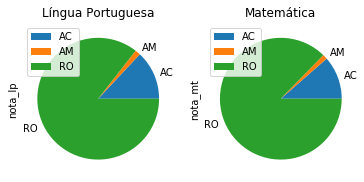

In [46]:
dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / len(dados_filtrados)
).plot.pie(subplots=True, figsize=(6, 4), title=['Língua Portuguesa', 'Matemática'])

#### Escopo de Média Por Estado

grupo uf, grupo_buscado AC type <class 'str'>
grupo uf, grupo_buscado AC type <class 'str'>
grupo uf, grupo_buscado AM type <class 'str'>
grupo uf, grupo_buscado RO type <class 'str'>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000213567C4940>,
      dtype=object)

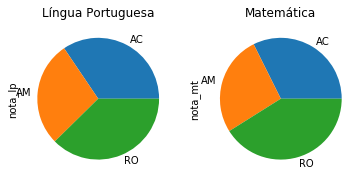

In [47]:
dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('uf', x.name), axis=1
).plot.pie(subplots=True, figsize=(6, 4), legend=False, title=['Língua Portuguesa', 'Matemática'])

### Disparidades Entre Aprendizagem

##### A=> Masculino
##### B=> Feminino

#### Média Geral de Aprendizado

In [67]:
dados_filtrados[['nota_lp', 'nota_mt']].mean()

nota_lp    14.912052
nota_mt    11.493296
dtype: float64

### Por Gênero

In [68]:
dados_filtrados.groupby('sexo').sum()\
[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('sexo', x.name), axis=1
)

grupo sexo, grupo_buscado A type <class 'str'>
grupo sexo, grupo_buscado A type <class 'str'>
grupo sexo, grupo_buscado B type <class 'str'>


,nota_lp,nota_mt
sexo,,
A,14.383306,12.000824
B,15.507351,11.134921


### Por Gênero e Estado

In [69]:
dados_filtrados.groupby(['uf', 'sexo'])[['nota_lp', 'nota_mt']].sum().unstack()\
.apply(
    lambda x: x / conta_tamanho_grupo(['uf', 'sexo'], x.name[1])
)

grupo ['uf', 'sexo'], grupo_buscado A type <class 'str'>
3252
grupo ['uf', 'sexo'], grupo_buscado B type <class 'str'>
3939
grupo ['uf', 'sexo'], grupo_buscado A type <class 'str'>
3252
grupo ['uf', 'sexo'], grupo_buscado B type <class 'str'>
3939


nota_lp               nota_mt           
sexo          A          B          A          B
uf                                              
AC    13.332718  14.427520   9.974477   8.981214
AM     1.464637   1.501650   1.085793   0.953542
RO    92.502460  91.712871  78.466175  67.356690

In [70]:
dados_filtrados.groupby('sexo').sum()\
[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('sexo', x.name), axis=1
)

grupo sexo, grupo_buscado A type <class 'str'>
grupo sexo, grupo_buscado A type <class 'str'>
grupo sexo, grupo_buscado B type <class 'str'>


,nota_lp,nota_mt
sexo,,
A,14.383306,12.000824
B,15.507351,11.134921
